In [156]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time

**Zadání -10 + (x-3)^2**

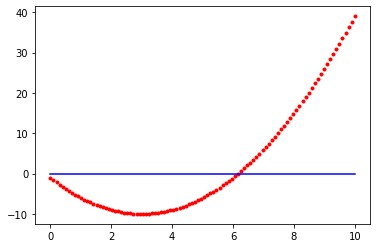

In [172]:
def f(x):
    return -10+(x-3)**2

a0 = 0
b0 = 10
x = np.linspace(a0, b0, 100)
plt.plot(x, f(x), "r.")
plt.plot(x, [0]*len(x), "b-")   
plt.show()

1. **Bisekce - půlení intervalů**

0 5.0
1 7.5
2 6.25
3 5.625
4 5.9375
5 6.09375
6 6.171875
7 6.1328125
8 6.15234375
9 6.162109375
10 6.1669921875
11 6.16455078125
12 6.163330078125
13 6.1627197265625
14 6.16241455078125
15 6.162261962890625
16 6.1623382568359375
17 6.162300109863281
18 6.162281036376953
19 6.162271499633789
20 6.162276268005371
21 6.162278652191162
22 6.162277460098267
23 6.162278056144714
24 6.1622777581214905
25 6.1622776091098785
26 6.1622776836156845
27 6.1622776463627815
28 6.162277664989233
29 6.162277655676007
[5.         7.5        6.25       5.625      5.9375     6.09375
 6.171875   6.1328125  6.15234375 6.16210938 6.16699219 6.16455078
 6.16333008 6.16271973 6.16241455 6.16226196 6.16233826 6.16230011
 6.16228104 6.1622715  6.16227627 6.16227865 6.16227746 6.16227806
 6.16227776 6.16227761 6.16227768 6.16227765 6.16227766 6.16227766]


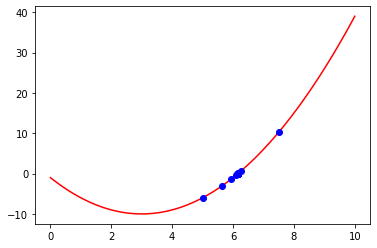

In [173]:
# Bisekce s ručním volením n
start=time.time()


a = a0
b = b0
n = 30

xs = np.empty(shape=[n])

for i in range(n):
    x = (a + b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    print(i, x)
    xs[i] = x

print(xs)
x = np.linspace(a0, b0, 100)
plt.plot(x, f(x), "r")
plt.plot(xs, f(xs), "bo")
plt.show()

end=time.time()
bisekce_n = end-start

5.0
7.5
6.25
5.625
5.9375
6.09375
6.171875
6.1328125
6.15234375
6.162109375
6.1669921875
6.16455078125
6.163330078125
6.1627197265625
6.16241455078125
6.162261962890625
6.1623382568359375
6.162300109863281
6.162281036376953
6.162271499633789
6.162276268005371
6.162278652191162
6.162277460098267
6.162277460098267


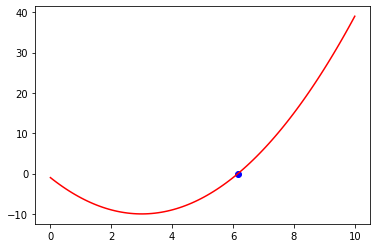

23


In [174]:
# Bisekce s určení přesností výsledku
start=time.time()
a = a0
b = b0
eps = 0.00001 # požadovaná přesnost

i=0

while b**2 - a**2 > 2*eps:
    x = (a + b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    print(x)
    i+=1

print(x)
plt.plot(x, f(x), "bo")
plt.plot(np.linspace(a0, b0, 100), f(np.linspace(a0, b0, 100)), "r")
plt.show()
print(i)
end=time.time()
bisekce_eps = end-start

2. **Regula falsi - metoda tětiv**

In [175]:
start=time.time()
a = a0
b = b0
delta = 1E-5

xnew = (a+b)/2
xold = a
while abs(xnew - xold) > delta:
    xold = xnew
    xnew = a - f(a)*(b-a)/(f(b)-f(a))
    if f(a)*f(xnew) < 0:
        b = xnew
    else:
        a = xnew
print(xnew)
end=time.time()
falsi_skript = end-start

6.162271798827216


3. **Newtonova metoda**

In [176]:
def df(x, h = 1E-5):
    return (f(x+h)-f(x-h))/(2*h)

start=time.time()
a = a0
b = b0
delta = 1E-5

xnew = (a+b)/2
xold = a
while abs(xnew - xold) > delta:
    xold = xnew
    xnew = xold - f(xold)/df(xold)
print(xnew)

end=time.time()
newton_skript = end-start

6.162277660168379


In [177]:
from scipy import optimize

start=time.time()

x = optimize.newton(f, x0=(a0+b0/2))
print(x)

end=time.time()
newton_knihovna = end-start

6.162277660168379


**Porovnání časů**

In [180]:
print(f"Čas potřebný pro nalezení řešení: \n")
print("#-----------------------------------#")
print("Bisekce pro n:        ", bisekce_n)
print("Bisekce pro odchylku: ", bisekce_eps)
print("Regula falsi:         ", falsi_skript)
print("Newtownova metoda:    ", newton_skript)
print("Newton. m. z knihovny:", newton_knihovna)

Čas potřebný pro nalezení řešení: 

#-----------------------------------#
Bisekce pro n:         0.32941603660583496
Bisekce pro odchylku:  0.2155601978302002
Regula falsi:          0.0005152225494384766
Newtownova metoda:     0.0003044605255126953
Newton. m. z knihovny: 0.006808280944824219


Cíl:  hledáme kořen zadané funkce na daném intervalu. Přesnost na 5 desetinných míst.

